# Problemas de Advección

Este modulo explora la ecuacion de adveccion en mayor detalle, aplicada al problema de flujo del tráfico. Ya hemos introducido el problema de adveccion en el [Cuaderno 1 del Modulo 2](../modulo2/02_01_Conveccion1D.ipynb). Esta ecuacion de tipo *hiperbolico* resulta muy interesante puesto que su solucion puede desarrollar *choques*; es decir regiones con gradientes muy grandes, aspecto que torna dificultoso su tratamiento con metodos numericos.

## Leyes de conservación

Los sistemas físicos y químicos aislados poseen ciertas propiedades que no cambian como, por ejemplo, la masa, la energía y si, además están en equilibrio térmico, la temperatura. Cuando hablamos de *leyes de conservación* nos referimos a un subconjunto de estas propiedades que se conservan cuando estos sistemas interactúan; así hablamos de conservación de la masa o conservación de la energía.

### Conservación de la masa

Para cualquier sistema cerrado, sabemos que la masa $M$ en el sistema no cambia, por lo cual podemos escribir: $\frac{DM}{Dt}=0$. Al considerar en cambio un *volumen de control*, la masa puede entrar y salir del mismo y la conservacion de la masa se expresa por:

![massconservation-CV](./figuras/massconservation-CV.png)

Imaginemos el volumen de control como un cilindro de seccion transversal $dA$ y longitud $dx$:

![1Dcontrolvolume](./figuras/1Dcontrolvolume.png)

Si representamos la densidad por $\rho$ y el volumen por $V$, la masa es igual a $\rho\times V$. Expresando la componente de velocidad en la direccion $x$ por $u$, la expresion matematica para la conservacion de la masa dentro del volumen de control es como sigue:

$$
\begin{equation}
\frac{\partial}{\partial t}\int_{\text{cv}}\rho \, dV + \int_{\text{cs}}\rho \, u\, dA =0 \;\;\;\;\;\;\;\;\;\;\;\;\;(1)
\end{equation}
$$

Puesto que el volumen de control es muy pequeño, podemos considerar $\rho$ como una cantidad constante en su interior, y el primer termino en la ecuacion $(1)$ resulta:

$$
\begin{equation}
\frac{\partial}{\partial t}\int_{\text{cv}}\rho \, dV \rightarrow \frac{\partial \rho}{\partial t} dA\,dx
\end{equation}
$$

A continuacion se ilustra el flujo masico a cada lado del volumen de control, donde empleamos una expansion de Taylor de la cantidad $\rho u$ alrededor del centro del volumen de control (a primer orden):

![1Dfluxbalance](./figuras/1Dfluxbalance.png)

Siendo $\dot{S}$ el flujo masico en la seccion de salida y $\dot{E}$ el flujo masico en la seccion de entrada del volumen de control, el segundo termino en la ecuacion $(1)$ resulta:

$$
\dot{S}-\dot{E}=\int_{\text{cs}}\rho \, u\, dA \rightarrow \frac{\partial}{\partial x}(\rho u)\,dA\,dx
$$

Sumando ambos terminos en la ecuacion $(1)$ y dividiendo por $dA\,dx$ obtenemos la ecuacion de conservacion de la masa en forma diferencial:

$$
\begin{equation}
\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}(\rho u)=0 \;\;\;\;\;\;\;\;\;\;\;\;\;(2)
\end{equation}
$$

Si consideramos $u$ constante, la ecuacion $(2)$ luce como la ecuacion de adveccion lineal tratada en el [Cuaderno 1 del Modulo 2](../modulo2/02_01_Conveccion1D.ipynb).

Pero en la forma escrita arriba, es una tipica *ley de conservacion*. El termino dentro de la derivada espacial es el *flujo*: representa una cantidad conservada que fluye a traves de las fronteras del volumen de control.

##### Dig deeper

<div class="alert alert-block alert-success">
You can follow the derivation of the full three-dimensional equation of conservation of mass for a flow on this screencast by Prof. Barba (duration 12:47).
</div>   

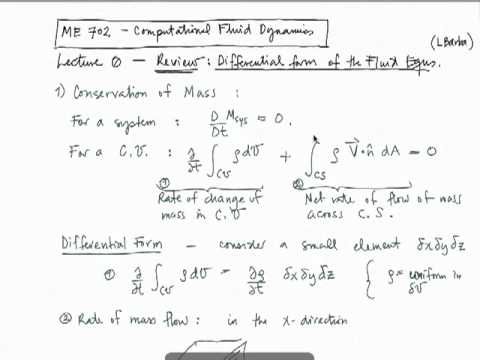

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('35unQgSaT88')

<div class="alert alert-block alert-danger">
<h2>General conservation laws</h2>
</div>

<div class="alert alert-block alert-success">
All conservation laws express the same idea: the variation of a conserved quantity inside a control volume is due to the total flux of that quantity crossing the boundary surface (plus possibly the effect of any sources inside the volume, but let's ignore those for now).

The _flux_ is a fundamental concept in conservation laws: it represents the amount of the quantity that crosses a surface per unit time. Our discussion above was limited to flow in one dimension, but in general the flux has any direction and is a vector quantity. Think about this: if the direction of flow is parallel to the surface, then no quantity comes in or out. We really only care about the component of flux perpendicular to the surface. Mathematically, for a vector flux $\vec{F}$, the amount of the conserved quantity crossing a small surface element is:

$$
\vec{F}\cdot d\vec{A}
$$

where $d\vec{A}$ points in the direction of the outward normal to the surface. A general conservation law for a quantity $e$ is thus (still ignoring possible sources):

$$
\begin{equation}
\frac{\partial}{\partial t}\int_{\text{cv}}e \, dV + \oint_{\text{cs}}\vec{F}\cdot d\vec{A} =0
\end{equation}
$$

To obtain a differential form of this conservation equation, we can apply the theorem of Gauss to the second integral, which brings the gradient of $\vec{F}$ into play. One way to recognize a conservation law in differential form is that the _fluxes appear only under the gradient operator_.

Recall the non-linear convection equation from [Cuaderno 1 del Modulo 2](../modulo2/02_01_Conveccion1D.ipynb). It was:

$$
\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0
\end{equation}
$$

If we look closely at the spatial derivative, we can rewrite this equation as

$$
\begin{equation}
\frac{\partial u}{\partial t} + \frac{\partial}{\partial x} \left(\frac{u^2}{2} \right) = 0
\end{equation}
$$

which is the *conservation form* of the non-linear convection equation, with flux $F=\frac{u^2}{2}$.
</div>    

##  Modelo de flujo del tráfico

Los modelos de tráfico vehicular parten de una ecuación de conservación de la masa, en nuestro caso conservación del número de vehículos.

La *densidad del tráfico* (numero promedio de autos por unidad de longitud de autopista) y la *velocidad del tráfico* están relacionadas por la ecuacion de conservación del tráfico $(2)$, donde el flujo dado por $F=\rho u$ es el numero de autos que circulan en un punto dado de la autopista por unidad de tiempo.

Si $\rho(x)=0$, no hay autos en el puntos $x$ de la autopista mientras que si $\rho(x) = \rho_{\rm max}$, el trafico presenta un congestionamiento (tranque). 

La experiencia nos dice que al aumentar el numero de autos en la autopista, la velocidad del trafico disminuye. Por otra parte, si viajamos a alta velocidad, aumenta el espacio (*gap*) entre los autos.
Ambas consideraciones nos conducen a proponer una funcion monotona decreciente $u=u(\rho)$. Como primer aproximacion, podemos considerar la funcion lineal:

$$
\begin{equation}
u(\rho) = u_{\rm max} \left(1-\frac{\rho}{\rho_{\rm max}}\right)
\end{equation}
$$

![velocityvsdensity](./figuras/velocityvsdensity.png)

Este modelo lineal de comportamiento del tránsito vehicular satisface las observaciones experimentales siguientes:  
1.  Todos los conductores se aproximaran a la velocidad maxima $u_{max}$ cuando la autopista este vacia.
2.  Si la autopista se encuentra completamente congestionada ($\rho \rightarrow \rho_{max}$), la velocidad es cero.  

Aplicando una ley de conservacion al trafico vehicular, la densidad de trafico obedecera la siguiente ecuacion de transporte:

$$
\begin{equation}
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0
\end{equation}
$$

donde $F$ es el *flujo de trafico*, el cual esta dado por la siguiente expresion para el caso del modelo **lineal**: 

$$
\begin{equation}
F = \rho u_{\rm max} \left(1-\frac{\rho}{\rho_{\rm max}}\right)
\end{equation}
$$

### Problema del semaforo

Imaginemos la situación donde el tráfico está alineado detrás de un semáforo en rojo ubicado en $x=2$. A la posición del semáforo, el trafico se encuentra congestionado ($\rho=\rho_{\rm max}$) y la densidad de trafico disminuye linealmente a cero a medida que nos aproximamos al comienzo de la autopista ($x=0$). Por delante del semaforo ($x>2$), la autopista esta libre de autos ($\rho=0$).
Matematicamente, podemos representar esta situacion por medio de la siguiente condicion inicial:

$$
\begin{equation}
\rho(x,0) = \left\{
\begin{array}{cc}
\rho_{\rm max}\frac{x}{2} & 0 \leq x < 2  \\
0 & 2 \leq x \leq 4 \\
\end{array}
\right.
\end{equation}
$$

Veamos como luce un grafico de la misma.

In [16]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [17]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [18]:
def rho_green_light(x, rho_light):
    """
    Computes the "green light" initial condition.
    It consists of a shock with a linear distribution behind it.
    
    Parameters
    ----------
    x : numpy.ndaray
        Locations on the road as a 1D array of floats.
    rho_light : float
        Car density at the stoplight.
    
    Returns
    -------
    rho : numpy.ndarray
        The initial car density along the road as a 1D array of floats.
    """
    rho = numpy.zeros_like(x)
    mask = numpy.where(x < 2.0)
    rho[mask] = rho_light * x[mask] / 2.0
    return rho

In [19]:
# Set parameters.
nx = 81  # number of locations on the road
L = 4.0  # length of the road
dx = L / (nx - 1)  # distance between two consecutive locations
nt = 30  # number of time step to compute
u_max = 1.0  # maximum speed allowed on the road
rho_max = 10.0  # maximum car density allowed on the road
rho_light = 10.0  # car density at the stoplight

# Discretize the road.
x = numpy.linspace(0.0, L, num=nx)

# Compute the initial traffic density.
rho0 = rho_green_light(x, rho_light)

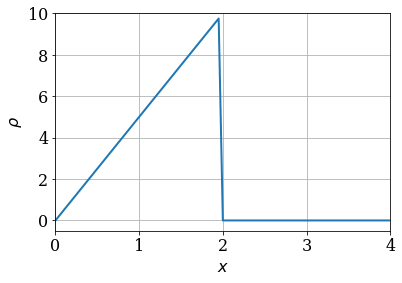

In [44]:
# Plot the initial car density on the road.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
pyplot.plot(x, rho0, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 10.0);

**Como se comportara el trafico una vez que la luz del semaforo cambie a verde?** Los autos comenzaran a moverse lentamente hacia adelante: el perfil de densidad deberia desplazarse hacia la derecha. Veamos si la solucion numerica concuerda con ello!

En primer lugar, definamos una funcion para calcular el flujo de trafico.

In [21]:
def flux(rho, u_max, rho_max):
    """
    Computes the traffic flux F = V * rho.
    
    Parameters
    ----------
    rho : numpy.ndarray
       Traffic density along the road as a 1D array of floats.
    u_max : float
        Maximum speed allowed on the road.
    rho_max : float
        Maximum car density allowed on the road.
    
    Returns
    -------
    F : numpy.ndarray
        The traffic flux along the road as a 1D array of floats.
    """
    F = rho * u_max * (1.0 - rho / rho_max)
    return F

### Forward-time / backward-space

Comencemos empleando un esquema en diferencias hacia adelante en tiempo y hacia atras en espacio. La forma discretizada de nuestro modelo de trafico es:

$$
\begin{equation}
\frac{\rho^{n+1}_i- \rho^n_{i}}{\Delta t}+ \frac{F^n_{i}-F^n_{i-1}}{\Delta x}=0
\end{equation}
$$

Como antes, avanzaremos en tiempo por medio de un bucle *for*, y calcularemos todos los puntos espaciales en forma simultanea por medio de operaciones vectoriales. En cada paso de tiempo, requerimos ademas invocar a la funcion que determina el flujo.

In [22]:
def ftbs(rho0, nt, dt, dx, bc_value, *args):
    """
    Computes the history of the traffic density on the road 
    at a certain time given the initial traffic density.
    
    Parameters
    ----------
    rho0 : numpy.ndarray
        The initial car density along the road
        as a 1D array of floats.
    nt : integer
        The number of time steps to compute.
    dt : float
        The time-step size to integrate.
    dx : float
        The distance between two consecutive locations.
    bc_value : float
        The constant density at the first station.
    args : list or tuple
        Positional arguments to be passed to the flux function.
    
    Returns
    -------
    rho_hist : list of numpy.ndarray objects
        The history of the car density along the road.
    """
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        # Compute the flux.
        F = flux(rho, *args)
        # Advance in time.
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        # Set the left boundary condition.
        rho[0] = bc_value
        # Record the time-step solution.
        rho_hist.append(rho.copy())
    return rho_hist

**Nota:** El codigo anterior devuelve la densidad de trafico completa para cada paso de tiempo. Lo usaremos al momento de generar animaciones con nuestros resultados.

In [23]:
# Set the time-step size based on CFL limit.
sigma = 1.0
dt = sigma * dx / u_max  # time-step size

# Compute the traffic density at all time steps.
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

Ahora generemos una animacion de la densidad de trafico usando el modulo `animation` de *Matplotlib*.

In [24]:
from matplotlib import animation
from IPython.display import HTML

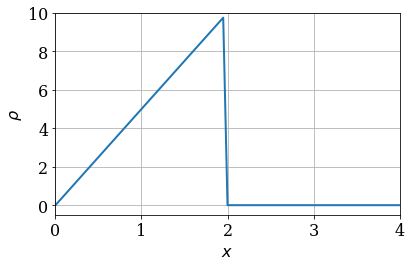

In [41]:
# Plot the initial traffic density.
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                    color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 10.0)
fig.tight_layout()

In [42]:
def update_plot(n, rho_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    rho_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])

In [43]:
# Create an animation of the traffic density.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
# Display the video.
HTML(anim.to_jshtml())

**La solucion explota!** esto **no** sucede en el Trabajo de código correspondiente al Modulo 2! Que sucede?

Veamos en mayor detalle la ecuacion que estamos resolviendo:

$$
\begin{equation}
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0
\end{equation}
$$

Aplicando la regla de la cadena, re-escribimos:

$$
\begin{equation}
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} = 0
\end{equation}
$$

Esta forma luce como la ecuacion de conveccion no lineal que hemos tratado en el [Cuaderno 1 del Modulo 2](../modulo2/02_01_Conveccion1D.ipynb). Se trata de una ecuacion de onda donde la velocidad de onda es $u_{\rm wave} = \frac{\partial F}{\partial\rho}$. Aquel termino es:

$$
\begin{equation}
u_{\rm wave} = \frac{\partial F}{\partial \rho} = u_{\rm max} \left( 1-2\frac{\rho}{\rho_{\rm max}} \right)
\end{equation}
$$

Notamos que la velocidad de onda cambia de signo en $\rho=\rho_{\rm max}/2$. Esto quiere decir que para la condicion inicial dada en el problema del semaforo, la porcion de onda situada por debajo de $\rho=\rho_{\rm max}/2$ se movera hacia la derecha, mientras que la porcion de onda situada por encima de esta marca se movera hacia la izquierda! 

Si bien este aspecto no genera un problema en terminos del modelo, tenemos que un esquema hacia atras en espacio es **inestable** para valores negativos de la velocidad de onda. 

## Esquemas Upwind

Notamos que la discretizacion espacial *hacia atras* se encuentra sesgada espacialmente: incluimos los puntos $i$ e $i-1$ en la formula, tal como ilustra el *stencil* siguiente:

![FTBS_stencil](./figuras/FTBS_stencil.png)

De hecho, el sesgo espacial ha sido pensado en la direccion de propagacion de la onda —hemos corroborado esto al resolver la ecuacion de conveccion (con velocidad de onda positiva $c$). Aquellos esquemas de discretizacion que presentan un sesgo en la direccion en la cual se propaga la informacion se denominan *esquemas upwind*.

Comparemos el *stencil* anterior con el diagrama de las curvas caracteristicas para la ecuacion de conveccion lineal visto en el [Cuaderno 1 del Modulo 2](../modulo2/02_01_Conveccion1D.ipynb). El punto es que hay una direccionalidad inherente en la fisica, y procuramos que el esquema numerico respete la misma direccionalidad. Se trata de un ejemplo en el cual se busca *elegir un esquema apropiado* para el problema fisico.

Si quisieramos resolver la ecuacion de conveccion con velocidad de onda negativa, $c<0$, requeririamos un sesgo espacial "inclinado hacia la izquierda" el cual podria obtenerse usando los puntos $i$ e $i+1$ en la formula.

Pero si tenemos ondas viajando en ambas direcciones? Una forma de evitar este problema en nuestro modelo de trafico vehicular consiste simplemente en usar una condicion inicial la cual **NO** produzca una velocidad negativa. Mas adelante aprenderemos otros esquemas numericos capaces de tratar ondas en ambas direcciones.

Consideremos ahora el esquema **forward-time/backward-space** con la condicion inicial

\begin{equation}\rho(x,0) = \left\{ \begin{array}{cc}
2.5 x & 0 \leq x < 2  \\
0 & 2 \leq x \leq 4 \\ \end{array} \right.\end{equation}

Si para todo valor de $x$ se verifica $\rho \leq \rho_{\rm max}/2$, entonces $\frac{\partial F}{\partial \rho}$ es positivo para cualquier posicion. Para esta condicion, nuestro esquema *forward-time/backward-space* **NO** deberia presentar inconveniente alguno, puesto que todas las velocidades son positivas.

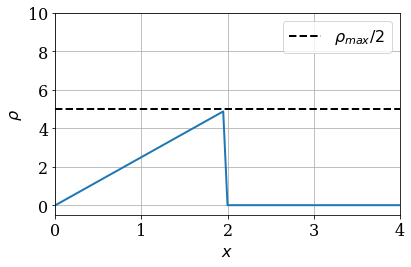

In [50]:
# Modify some parameters.
nt = 40  # number of time step to compute
rho_light = 5.0  # car density at the stoplight

# Compute the initial traffic density.
rho0 = rho_green_light(x, rho_light)

# Plot the initial traffic density.
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.hlines(rho_max/2.0, 0.0, L,
              label=r'$\rho_{max} / 2$',
              color='black', linestyle='--', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 10.0)
fig.tight_layout()

In [51]:
# Compute the traffic density at all time steps.
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

In [52]:
# Create an animation of the traffic density.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
# Display the animation.
HTML(anim.to_jshtml())

Bien! Intente reproducir este problema empleando diferentes condiciones iniciales! 

Tambien, usted podria generar una nueva funcion `ftfs` que emplee un esquema **forward-time/forward-space**, el cual sea estable para velocidades de onda negativas. Tener en cuenta que **forward** en espacio sera inestable para velocidades de onda positivas! A fin de evitar la explosion de la simulacion, debe asegurarse que la velocidad de onda es negativa en toda posicion: $u_{\rm wave} = \frac{\partial F}{\partial \rho} < 0, \;\; \forall x$.

<div class="alert alert-block alert-info">
Look at that solution again, and you'll get some nice insights of the real physical problem. See how on the trailing edge, a shock is developing? In the context of the traffic flow problem, a shock is a sign of a traffic jam: a region where traffic is heavy and slow next to a region that is free of cars. In the initial condition, the cars in the rear end of the triangle see a mostly empty road (traffic density is low!).  They see an empty road and speed up, accordingly.  The cars in the peak of the triangle are moving pretty slowly because traffic density is higher there.  Eventually the cars that started in the rear will catch up with the rest and form a traffic jam.
</div>    

## Atencion ... condicion CFL!

El [Cuaderno 2 del Modulo 2](../modulo2/02_02_CondicionCFL.ipynb) trata la condicion CFL para la ecuacion de conveccion lineal. Recordemos que, para una velocidad de onda constante $u_{\rm wave}=c$:

$$
\begin{equation}
\sigma = c\frac{\Delta t}{\Delta x} < 1
\end{equation}
$$

Que sucede para ecuaciones **no-lineales**? La velocidad de onda depende del espacio y del tiempo, $u_{\rm wave}=u_{\rm wave}(x,t)$, y la condicion CFL debera ser satisfecha para todo punto en el espacio y para todo instante de tiempo. Solo basta con verificar $\sigma>1$ en cualquier punto del dominio, para que la solucion explote! 

Generalizemos la condicion CFL a

$$
\begin{equation}
\sigma = \max\left[ \left| u_{\rm wave} \right| \frac{\Delta t}{\Delta x} \right] < 1
\end{equation}
$$

la cual en nuestro caso es

$$
\begin{equation}
\sigma = \max\left[ u_{\rm max} \left| 1-\frac{2 \rho}{\rho_{\rm max}} \right| \frac{\Delta t}{\Delta x} \right] < 1
\end{equation}
$$

Aqui, cuanto mas cerca se encuentre $\rho$ de ser nulo, resulta mas probable que el sistema se torne inestable.

### El problema del semaforo y la condicion CFL

Sabemos que el problema del semaforo con $\rho_{\rm light}=4$ es estable empleando un esquema *forward-time/backward-space*. Anteriormente usamos $u_{\rm max}=1$, y $\Delta t/\Delta x=1$, resultando un valor de $\sigma=1$, cuando $\rho=0$. 

Que sucede si cambiamos ligeramente las condiciones, digamos $u_{\rm max}=1.1$? 

In [53]:
# Set parameters.
rho_light = 4.0
u_max = 1.1

# Compute the initial traffic density.
rho0 = rho_green_light(x, rho_light)

# Compute the traffic density at all time steps.
rho_hist = ftbs(rho0, nt, dt, dx, rho0[0], u_max, rho_max)

# Create an animation of the traffic density.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(rho_hist,),
                               interval=100)
# Display the video.
HTML(anim.to_jshtml())

<div class="alert alert-block alert-danger">
That failed miserably! Only by changing $u_{\rm max}$ to $1.1$, even an algorithm that we know is stable for this problem, fails. Since we kept $\Delta t/\Delta x=1$, the CFL number for $\rho=0$ is $1.1$. See where the instability begins? Beware the CFL!
</div>   

## Referencias

* Neville D. Fowkes and John J. Mahony, *"An Introduction to Mathematical Modelling,"* Wiley & Sons, 1994. Chapter 14: Traffic Flow.

* M. J. Lighthill and G. B. Whitham (1955), On kinematic waves. II. Theory of traffic flow and long crowded roads, _Proc. Roy. Soc. A_, Vol. 229, pp. 317–345. [PDF from amath.colorado.edu](https://amath.colorado.edu/sites/default/files/2013/09/1710796241/PRSA_Lighthill_1955.pdf), checked Oct. 14, 2014. [Original source](http://rspa.royalsocietypublishing.org/content/229/1178/317.short) on the Royal Society site.

---

###### The cell below loads the style of the notebook.

In [54]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())